# Problem

![insanely-hard-problem](fit-circle.jpg)

# Solution

In [1]:
import math
from scipy.optimize import least_squares
import numpy as np

In [2]:
def to_deg(a):
    return a / np.pi * 180

def fn(x):
    return np.sqrt(x)

def deriv(x):
    # f = sqrt(x) = x ** 0.5 
    # ∴ f' = 0.5 * x ** (0.5 - 1) = 0.5 / sqrt(x)
    return 0.5 / np.sqrt(x)

def translate_along_line(x0, y0, r, angle):
    x = x0 + r * np.cos(angle)
    y = y0 + r * np.sin(angle)
    return x, y

def rotate90_ccw(angle):
    return angle + np.pi / 2

In [3]:
# Find solution (x, r) where x is touch point of circle and f(x) = sqrt(x) and r is radius

def fun(X):
    x, r = X
    y = fn(x)
    k = deriv(x) # dy/dx = tan(alpha)
    alpha = np.arctan(k) # tangent line angle
    beta = rotate90_ccw(alpha) # ortogonal line angle
    cx, cy = translate_along_line(x, y, r, beta) # center of the circle, located on ortogonal line at distance r from point (x, y)
    resid1 = abs(r - cx) # error1
    resid2 = abs(r - (1 - np.sqrt(cx*cx + cy*cy))) # error2
    return resid1 + resid2

bounds = [(0, 0), (1, 1)]
x0 = (0.5, 0.5)
sol = least_squares(fun, x0, bounds=bounds)
# radius (solution)
sol.x[1]

0.2138417833351145

In [6]:
sol

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 1.286e-08]
           x: [ 3.517e-01  2.138e-01]
        cost: 8.267665716205865e-17
         jac: [[ 9.652e-01  3.205e+00]]
        grad: [ 1.241e-08  4.121e-08]
  optimality: 8.812949600551415e-09
 active_mask: [0 0]
        nfev: 41
        njev: 23

# Plot

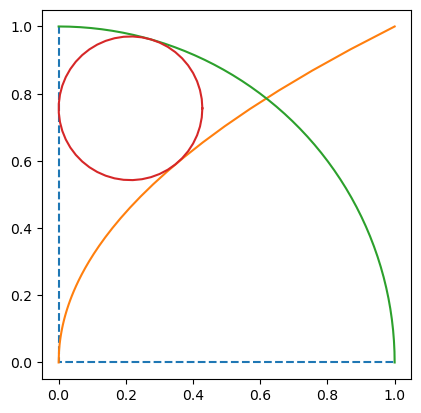

In [5]:
from matplotlib import pyplot as plt

x, r = sol.x
y = fn(x)
k = deriv(x)
alpha = math.atan(k)
beta = rotate90_ccw(alpha)
cx, cy = translate_along_line(x, y, r, beta)

def circle(cx, cy, r, a1 = 0, a2 = 2 * math.pi):
    ts = np.linspace(a1, a2)
    xs = cx + r * np.cos(ts)
    ys = cy + r * np.sin(ts)
    return xs, ys

xs1, ys1 = circle(0, 0, 1, 0, math.pi / 2)
xs2, ys2 = circle(cx, cy, r)

xs3 = np.hstack([[0.0], np.logspace(-3,0)])
ys3 = fn(xs3)

points = [(0, 1), (0, 0), (1, 0)]
xs4, ys4 = list(zip(*points))

plt.plot(xs4, ys4, '--')
plt.plot(xs3, ys3, '-')
plt.plot(xs1, ys1, '-')
plt.plot(xs2, ys2, '-')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()